<a href="https://colab.research.google.com/github/AbdallahSamirr/farmingham_KNN/blob/main/superstore_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [17]:
df = pd.read_csv('/content/superstore.csv')

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
df.drop([])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [22]:
df.drop(['Order ID','Product ID','Customer ID'],axis=1,inplace=True)

In [23]:
df.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer Name  9800 non-null   object 
 5   Segment        9800 non-null   object 
 6   Country        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Postal Code    9789 non-null   float64
 10  Region         9800 non-null   object 
 11  Category       9800 non-null   object 
 12  Sub-Category   9800 non-null   object 
 13  Product Name   9800 non-null   object 
 14  Sales          9800 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


In [25]:
df.drop('Customer Name',axis =1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9800 non-null   int64  
 1   Order Date    9800 non-null   object 
 2   Ship Date     9800 non-null   object 
 3   Ship Mode     9800 non-null   object 
 4   Segment       9800 non-null   object 
 5   Country       9800 non-null   object 
 6   City          9800 non-null   object 
 7   State         9800 non-null   object 
 8   Postal Code   9789 non-null   float64
 9   Region        9800 non-null   object 
 10  Category      9800 non-null   object 
 11  Sub-Category  9800 non-null   object 
 12  Product Name  9800 non-null   object 
 13  Sales         9800 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


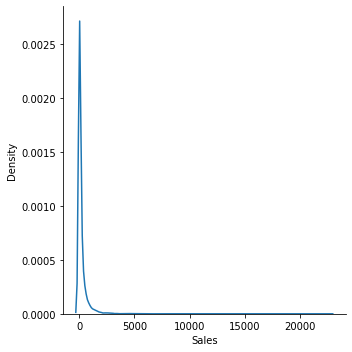

In [30]:
sns.displot(data=df,x='Sales',kind='kde')
plt.show()

In [43]:
df['Sales_scaled']=np.log(df['Sales'])

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9800 non-null   int64  
 1   Order Date    9800 non-null   object 
 2   Ship Date     9800 non-null   object 
 3   Ship Mode     9800 non-null   object 
 4   Segment       9800 non-null   object 
 5   Country       9800 non-null   object 
 6   City          9800 non-null   object 
 7   State         9800 non-null   object 
 8   Postal Code   9789 non-null   float64
 9   Region        9800 non-null   object 
 10  Category      9800 non-null   object 
 11  Sub-Category  9800 non-null   object 
 12  Product Name  9800 non-null   object 
 13  Sales         9800 non-null   float64
 14  Sales_scaled  9800 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


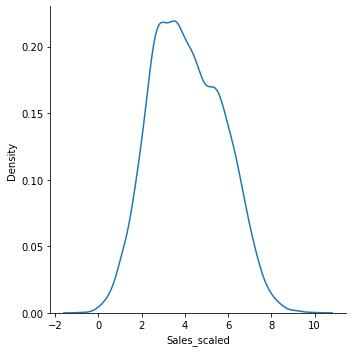

In [46]:
sns.displot(data=df,x='Sales_scaled',kind='kde')
plt.show()

In [47]:
df.drop('Row ID',axis=1,inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9800 non-null   object 
 1   Ship Date     9800 non-null   object 
 2   Ship Mode     9800 non-null   object 
 3   Segment       9800 non-null   object 
 4   Country       9800 non-null   object 
 5   City          9800 non-null   object 
 6   State         9800 non-null   object 
 7   Postal Code   9789 non-null   float64
 8   Region        9800 non-null   object 
 9   Category      9800 non-null   object 
 10  Sub-Category  9800 non-null   object 
 11  Product Name  9800 non-null   object 
 12  Sales         9800 non-null   float64
 13  Sales_scaled  9800 non-null   float64
dtypes: float64(3), object(11)
memory usage: 1.0+ MB


In [53]:
df.duplicated().sum()

1

In [54]:
df.drop_duplicates(inplace=True)

In [56]:
df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code     11
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Sales_scaled     0
dtype: int64

In [57]:
df['Postal Code'].fillna(5401,inplace=True)

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Sales_scaled    0
dtype: int64

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9799 non-null   datetime64[ns]
 1   Ship Date     9799 non-null   datetime64[ns]
 2   Ship Mode     9799 non-null   object        
 3   Segment       9799 non-null   object        
 4   Country       9799 non-null   object        
 5   City          9799 non-null   object        
 6   State         9799 non-null   object        
 7   Postal Code   9799 non-null   float64       
 8   Region        9799 non-null   object        
 9   Category      9799 non-null   object        
 10  Sub-Category  9799 non-null   object        
 11  Product Name  9799 non-null   object        
 12  Sales         9799 non-null   float64       
 13  Sales_scaled  9799 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 1.1+ MB


In [62]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Sales_scaled'],
      dtype='object')

<Axes: xlabel='Segment', ylabel='count'>

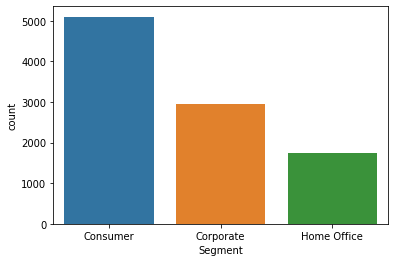

In [63]:
sns.countplot(data=df,x='Segment')

In [64]:
fig = px.pie(df, values=np.ones(9799), names='Ship Mode', title='Ship Mode')
fig.show()

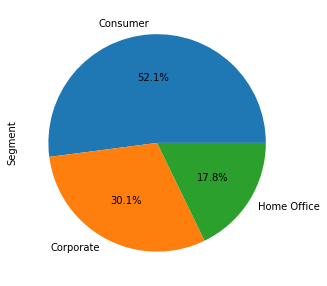

In [71]:
plt.figure(figsize=(10,5))
df['Segment'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

In [72]:
top_cities= df.groupby("City").sum().sort_values("Sales_scaled",ascending=False).head(15)
top_cities= top_cities[['Sales_scaled']].round(2)
top_cities.reset_index(inplace=True)
top_cities

fig=px.bar(top_cities,x='City',y='Sales_scaled',title="Top 15 Cities",color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [74]:
top_states= df.groupby("State").sum().sort_values("Sales_scaled",ascending=False).head(15)
top_states= top_states[['Sales_scaled']].round(2)
top_states.reset_index(inplace=True)
top_states
fig=px.bar(top_states,x='State',y='Sales_scaled',title="Top 15 Cities")
fig.show()

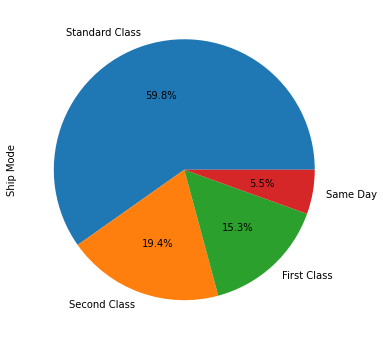

In [76]:
plt.figure(figsize=(16,6))
df['Ship Mode'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

In [79]:
display(px.pie(df['Category'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Category', names='Type', title='Category'))

In [80]:
Categoris= df.groupby("Category").sum().sort_values("Sales_scaled",ascending=False).head(15)
Categoris= Categoris[['Sales_scaled']].round(2)
Categoris.reset_index(inplace=True)

fig = px.pie(Categoris, values='Sales_scaled', names='Category', title='Categoris by its sales',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [81]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Sales_scaled'],
      dtype='object')

In [82]:
sub_category = df.groupby(['Region']).sum().sort_values('Sales_scaled', ascending=False).head(10)
sub_category = sub_category[['Sales_scaled']].round(3)
sub_category

,Sales_scaled
Region,
West,13190.562
East,11506.013
Central,9016.346
South,6570.262


In [83]:
sub_category.reset_index(inplace = True)

Text(0, 0.5, 'Revenu')

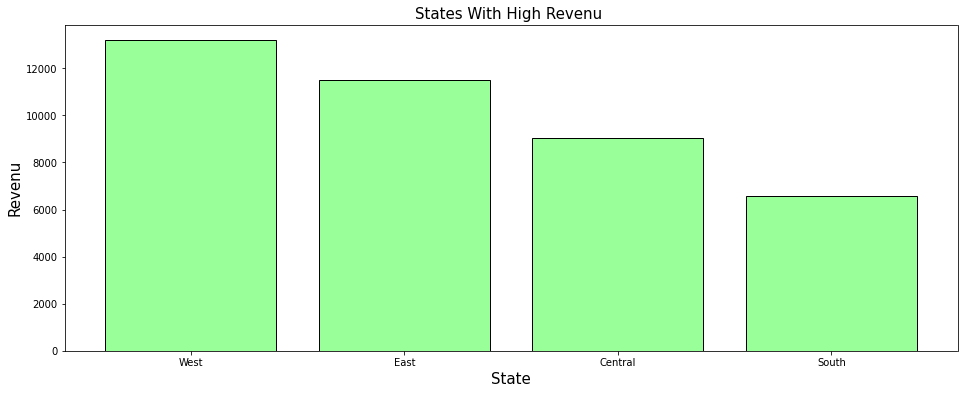

In [84]:
plt.figure(figsize=(16,6))

plt.bar(sub_category['Region'],sub_category['Sales_scaled'] ,color="#99ff99" , edgecolor='black')

plt.xticks(rotation='horizontal')
plt.title('States With High Revenu ',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Revenu',fontsize=15)

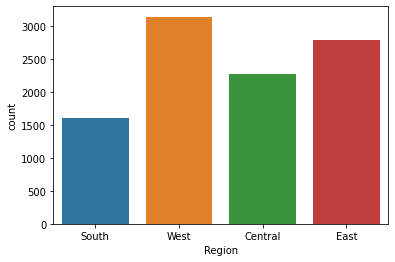

In [85]:
sns.countplot(x='Region',data=df)
plt.show()

In [87]:
Segments= df.groupby("Segment").sum().sort_values("Sales_scaled",ascending=False)
Segments= Segments[['Sales_scaled']].round(2)
Segments.reset_index(inplace=True)

fig=px.pie(Segments,names='Segment',values='Sales_scaled',title="Segments by Sales")
fig.show()

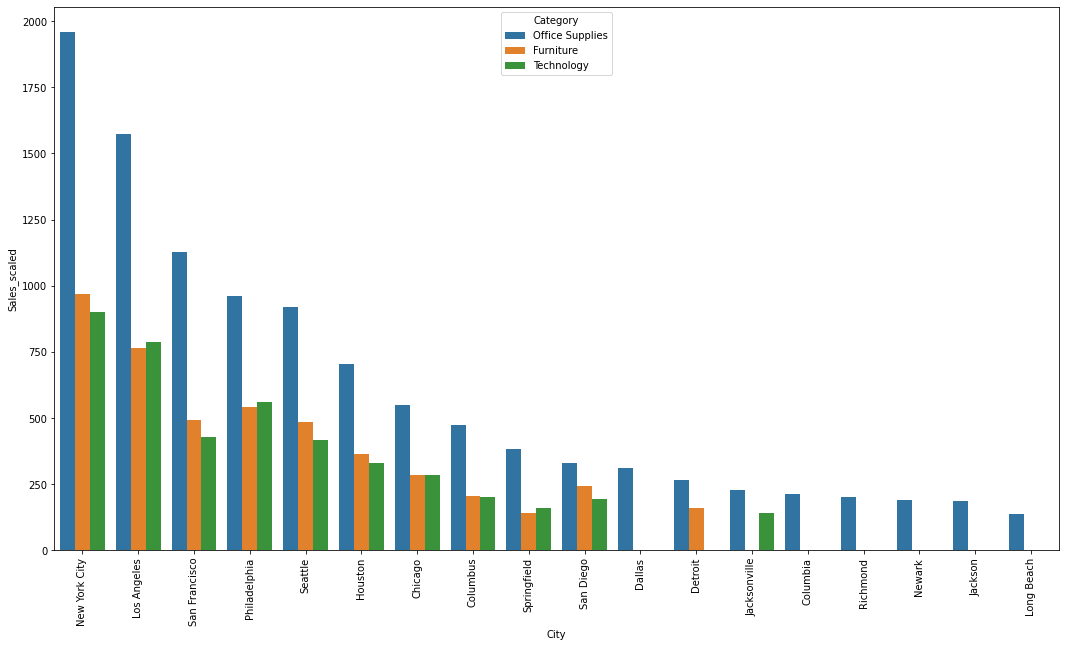

In [89]:
plt.figure(figsize=(18,10))
top_cities= df.groupby(["City","Category"]).sum().sort_values("Sales_scaled",ascending=False).head(40)
top_cities= top_cities[['Sales_scaled']].round(2)
top_cities.reset_index(inplace=True)
sns.barplot(x='City',y='Sales_scaled',hue='Category',data=top_cities)
plt.xticks(rotation='vertical')
plt.show()